## Import Libraries

In [ ]:
import os
import numpy as np

In [2]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


## Data Loading

In [3]:
data_path='C:\\data\\work\\IOD\\CapStone\\data'

In [4]:
arr = os.listdir(data_path)
print(arr)

['VIC_20140401_20140630.csv', 'VIC_20140701_20140930.csv', 'VIC_20141001_20141231.csv', 'VIC_20150101_20150331.csv', 'VIC_20150401_20150630.csv', 'VIC_20150701_20150930.csv', 'VIC_20151001_20151231.csv', 'VIC_20160101_20160331.csv', 'VIC_20160401_20160630.csv', 'VIC_20160701_20160930.csv', 'VIC_20161001_20161231.csv', 'VIC_20170101_20170331.csv', 'VIC_20170401_20170630.csv', 'VIC_20170701_20170930.csv', 'VIC_20171001_20171231.csv', 'VIC_20180101_20180331.csv', 'VIC_20180401_20180630.csv', 'VIC_20180701_20180930.csv', 'VIC_20181001_20181231.csv', 'VIC_20190101_20190331.csv', 'VIC_20190401_20190630.csv', 'VIC_201907 to 201909.csv']


In [5]:
df1 = pd.read_csv(data_path + '\\' + arr[0])

In [6]:
df1.head()

,SETTD,PROFILEAREA,DAILYT,VAL01,VAL02,VAL03,VAL04,VAL05,VAL06,VAL07,...,VAL40,VAL41,VAL42,VAL43,VAL44,VAL45,VAL46,VAL47,VAL48,DCTC
0,01/04/2014,CITIPOWER,6363749.701,83948.634,75686.720,70851.453,67607.385,66124.942,64953.942,64306.671,...,160069.821,152968.056,145198.285,133952.389,121154.389,113845.677,111219.265,111446.631,106211.512,MRIM
1,02/04/2014,CITIPOWER,5630825.535,93503.589,84693.357,79590.499,76384.550,74882.906,73439.136,72621.772,...,124538.811,119661.538,113667.967,105081.148,95684.746,91694.112,91698.657,93790.379,89377.501,MRIM
2,03/04/2014,CITIPOWER,5173891.385,77688.455,69851.785,65002.304,62203.224,60863.263,59985.433,59409.226,...,122934.586,118084.353,112122.808,104010.749,94635.246,90432.761,90406.507,92838.823,89320.024,MRIM
3,04/04/2014,CITIPOWER,5044050.180,77761.113,69530.046,64437.280,61304.327,59653.842,58588.591,58218.212,...,114460.060,110398.858,105854.672,100063.838,93741.476,91659.930,93286.271,96403.437,92482.282,MRIM
4,05/04/2014,CITIPOWER,4383318.300,80930.298,72390.242,66461.934,63121.603,60993.088,59567.853,58667.439,...,107937.349,104206.712,100866.709,96744.697,91474.783,91223.017,94194.091,98842.620,95486.413,MRIM


In [7]:
df1.PROFILEAREA.value_counts()

TXU          91
VICAGL       91
UNITED       91
CITIPOWER    91
POWERCOR     91
Name: PROFILEAREA, dtype: int64

In [8]:
df1.SETTD = pd.to_datetime(df1.SETTD,format = '%d/%m/%Y')

In [9]:
df1.head()

,SETTD,PROFILEAREA,DAILYT,VAL01,VAL02,VAL03,VAL04,VAL05,VAL06,VAL07,...,VAL40,VAL41,VAL42,VAL43,VAL44,VAL45,VAL46,VAL47,VAL48,DCTC
0,2014-04-01,CITIPOWER,6363749.701,83948.634,75686.720,70851.453,67607.385,66124.942,64953.942,64306.671,...,160069.821,152968.056,145198.285,133952.389,121154.389,113845.677,111219.265,111446.631,106211.512,MRIM
1,2014-04-02,CITIPOWER,5630825.535,93503.589,84693.357,79590.499,76384.550,74882.906,73439.136,72621.772,...,124538.811,119661.538,113667.967,105081.148,95684.746,91694.112,91698.657,93790.379,89377.501,MRIM
2,2014-04-03,CITIPOWER,5173891.385,77688.455,69851.785,65002.304,62203.224,60863.263,59985.433,59409.226,...,122934.586,118084.353,112122.808,104010.749,94635.246,90432.761,90406.507,92838.823,89320.024,MRIM
3,2014-04-04,CITIPOWER,5044050.180,77761.113,69530.046,64437.280,61304.327,59653.842,58588.591,58218.212,...,114460.060,110398.858,105854.672,100063.838,93741.476,91659.930,93286.271,96403.437,92482.282,MRIM
4,2014-04-05,CITIPOWER,4383318.300,80930.298,72390.242,66461.934,63121.603,60993.088,59567.853,58667.439,...,107937.349,104206.712,100866.709,96744.697,91474.783,91223.017,94194.091,98842.620,95486.413,MRIM


In [10]:
df1_part = df1[df1.PROFILEAREA=='CITIPOWER']

In [11]:
df1.shape

(455, 52)

In [12]:
df1.tail()

,SETTD,PROFILEAREA,DAILYT,VAL01,VAL02,VAL03,VAL04,VAL05,VAL06,VAL07,...,VAL40,VAL41,VAL42,VAL43,VAL44,VAL45,VAL46,VAL47,VAL48,DCTC
450,2014-06-26,VICAGL,5182764.262,90625.755,81423.224,74059.012,68835.498,65341.944,62979.855,61589.515,...,155152.506,151758.609,147634.810,140969.737,132965.633,121135.892,107911.632,113992.813,105218.835,MRIM
451,2014-06-27,VICAGL,5370975.306,93273.396,83347.477,75885.525,70240.914,66439.524,63907.953,62414.209,...,154655.021,150676.737,146657.699,141456.023,135492.763,126824.799,116671.521,124253.269,115661.947,MRIM
452,2014-06-28,VICAGL,5254584.440,103073.268,91655.361,83342.900,77093.228,72295.368,68795.068,66361.034,...,149456.319,144733.148,140721.141,135878.594,129740.900,122679.380,114686.161,124532.924,116971.564,MRIM
453,2014-06-29,VICAGL,5532967.933,105852.735,95592.339,87089.247,80402.592,75436.005,71838.754,69289.529,...,164051.784,160839.985,157243.838,151637.451,143164.186,130282.979,116479.982,123712.363,114295.999,MRIM
454,2014-06-30,VICAGL,5921684.193,102171.675,91907.579,84364.678,78958.044,75039.010,71799.311,69826.879,...,168893.417,163868.830,158434.017,151318.421,141482.852,129440.274,114217.304,120077.228,110506.956,MRIM


In [13]:
all_data = pd.DataFrame()
for csv_file in arr:
    
    df1 = pd.read_csv(data_path + '\\' + csv_file)
    df1.SETTD = pd.to_datetime(df1.SETTD,format = '%d/%m/%Y')
    df1_part = df1[df1.PROFILEAREA=='CITIPOWER']
    print([csv_file,df1_part.shape])
    if all_data.shape[0]==0:
        all_data = df1_part.copy()
    else:
        all_data = pd.concat([all_data,df1_part],ignore_index=True, sort=False)


['VIC_20140401_20140630.csv', (91, 52)]
['VIC_20140701_20140930.csv', (92, 52)]
['VIC_20141001_20141231.csv', (92, 52)]
['VIC_20150101_20150331.csv', (90, 52)]
['VIC_20150401_20150630.csv', (91, 52)]
['VIC_20150701_20150930.csv', (92, 52)]
['VIC_20151001_20151231.csv', (92, 52)]
['VIC_20160101_20160331.csv', (91, 52)]
['VIC_20160401_20160630.csv', (91, 52)]
['VIC_20160701_20160930.csv', (92, 52)]
['VIC_20161001_20161231.csv', (92, 52)]
['VIC_20170101_20170331.csv', (90, 52)]
['VIC_20170401_20170630.csv', (91, 52)]
['VIC_20170701_20170930.csv', (92, 52)]
['VIC_20171001_20171231.csv', (92, 52)]
['VIC_20180101_20180331.csv', (90, 52)]
['VIC_20180401_20180630.csv', (91, 52)]
['VIC_20180701_20180930.csv', (92, 52)]
['VIC_20181001_20181231.csv', (92, 52)]
['VIC_20190101_20190331.csv', (90, 52)]
['VIC_20190401_20190630.csv', (91, 52)]
['VIC_201907 to 201909.csv', (92, 52)]


In [14]:
all_data.tail()

,SETTD,PROFILEAREA,DAILYT,VAL01,VAL02,VAL03,VAL04,VAL05,VAL06,VAL07,...,VAL40,VAL41,VAL42,VAL43,VAL44,VAL45,VAL46,VAL47,VAL48,DCTC
2004,2019-09-26,CITIPOWER,5357014.025,104634.319,94261.824,85886.697,80117.194,76464.679,74115.823,72469.650,...,133527.972,130889.497,128188.384,124315.024,119627.636,117257.730,116889.511,116537.564,111083.906,MRIM
2005,2019-09-27,CITIPOWER,5219544.620,99948.011,90329.481,82614.079,76933.161,73274.364,70795.182,69070.446,...,147362.712,144706.918,141765.187,137929.071,132064.546,128539.473,127118.810,126562.299,120734.248,MRIM
2006,2019-09-28,CITIPOWER,5036389.054,109579.556,99327.006,90975.407,84615.531,80314.854,77476.184,75194.600,...,137504.917,136105.353,133972.117,130311.066,125324.594,122525.891,121376.335,121272.505,115959.738,MRIM
2007,2019-09-29,CITIPOWER,4993439.774,105339.777,95979.319,88359.469,82577.867,78649.056,75814.320,73827.575,...,151939.263,149157.150,145684.544,139140.890,130184.465,123603.663,119416.449,117391.576,111069.642,MRIM
2008,2019-09-30,CITIPOWER,6030581.529,100149.694,90839.884,83260.137,77680.655,73936.941,71453.252,69980.210,...,172685.887,169081.759,164475.117,156429.121,146284.126,136462.910,129778.602,125565.504,118117.204,MRIM


In [15]:
ts_data = all_data[['SETTD','DAILYT']]

In [16]:
ts_data.columns=['ds','y']

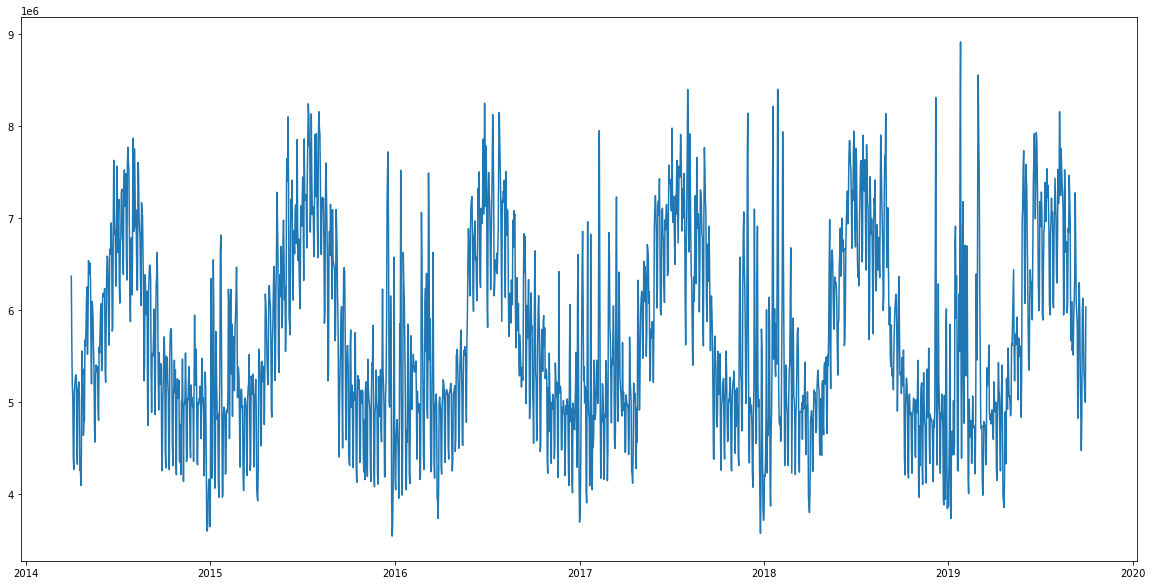

In [17]:
plt.figure(figsize=(20,10))
plt.plot(ts_data.ds,ts_data.y)

In [123]:
ts_data.head()

,ds,y
0,2014-04-01,6363749.701
1,2014-04-02,5630825.535
2,2014-04-03,5173891.385
3,2014-04-04,5044050.180
4,2014-04-05,4383318.300


In [18]:
horizon = 180
ts_train = ts_data.iloc[:-horizon,:]
ts_test = ts_data.iloc[-horizon:,:]

In [125]:
ts_data.tail()

,ds,y
2004,2019-09-26,5357014.025
2005,2019-09-27,5219544.620
2006,2019-09-28,5036389.054
2007,2019-09-29,4993439.774
2008,2019-09-30,6030581.529


In [127]:
ts_train.tail(horizon+1)

,ds,y
1648,2018-10-05,5170440.890
1649,2018-10-06,4395095.418
1650,2018-10-07,4201919.072
1651,2018-10-08,4892935.220
1652,2018-10-09,5137490.611
...,...,...
1824,2019-03-30,4635999.553
1825,2019-03-31,4588015.705
1826,2019-04-01,5214935.935
1827,2019-04-02,5039796.030


In [126]:
ts_test.head()

,ds,y
1829,2019-04-04,4885117.834
1830,2019-04-05,4991246.994
1831,2019-04-06,4280720.872
1832,2019-04-07,4143412.337
1833,2019-04-08,4810168.720


In [128]:
ts_test.tail()

,ds,y
2004,2019-09-26,5357014.025
2005,2019-09-27,5219544.620
2006,2019-09-28,5036389.054
2007,2019-09-29,4993439.774
2008,2019-09-30,6030581.529


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


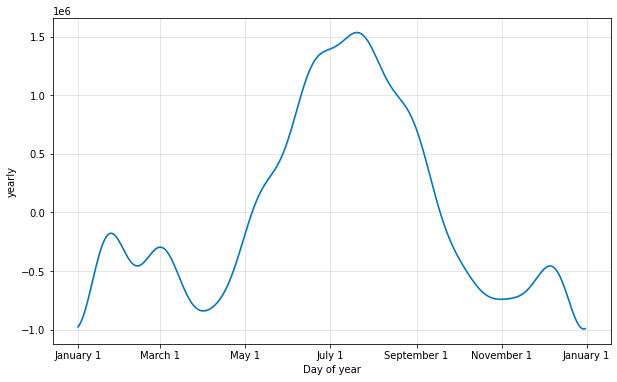

In [20]:
from fbprophet.plot import plot_yearly
m = Prophet().fit(ts_train)
a = plot_yearly(m)

In [21]:
future = m.make_future_dataframe(periods=horizon,freq='D')
future.tail(horizon+1)

,ds
1828,2019-04-03
1829,2019-04-04
1830,2019-04-05
1831,2019-04-06
1832,2019-04-07
...,...
2004,2019-09-26
2005,2019-09-27
2006,2019-09-28
2007,2019-09-29


In [22]:
future.head()

,ds
0,2014-04-01
1,2014-04-02
2,2014-04-03
3,2014-04-04
4,2014-04-05


In [23]:
ts_data.head()

,ds,y
0,2014-04-01,6363749.701
1,2014-04-02,5630825.535
2,2014-04-03,5173891.385
3,2014-04-04,5044050.180
4,2014-04-05,4383318.300


In [24]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
2004,2019-09-26,5.641260e+06,4.904283e+06,6.327252e+06
2005,2019-09-27,5.476986e+06,4.746633e+06,6.212365e+06
2006,2019-09-28,4.807360e+06,4.023936e+06,5.532341e+06
2007,2019-09-29,4.675959e+06,3.975800e+06,5.403066e+06
2008,2019-09-30,5.401872e+06,4.614048e+06,6.053621e+06


In [25]:
ts_predict = forecast.iloc[-horizon:,:]
ts_predict.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1829,2019-04-04,5.633657e+06,4.365692e+06,5.814609e+06,5.633657e+06,5.633657e+06,-5.432542e+05,-5.432542e+05,-5.432542e+05,290893.918763,290893.918763,290893.918763,-834148.104759,-834148.104759,-834148.104759,0.0,0.0,0.0,5.090403e+06
1830,2019-04-05,5.633469e+06,4.197236e+06,5.695156e+06,5.633469e+06,5.633469e+06,-6.761370e+05,-6.761370e+05,-6.761370e+05,153449.581374,153449.581374,153449.581374,-829586.535431,-829586.535431,-829586.535431,0.0,0.0,0.0,4.957332e+06
1831,2019-04-06,5.633280e+06,3.580703e+06,5.071628e+06,5.633280e+06,5.633280e+06,-1.314207e+06,-1.314207e+06,-1.314207e+06,-490550.158264,-490550.158264,-490550.158264,-823656.527284,-823656.527284,-823656.527284,0.0,0.0,0.0,4.319074e+06
1832,2019-04-07,5.633092e+06,3.432160e+06,4.992750e+06,5.633092e+06,5.633092e+06,-1.413814e+06,-1.413814e+06,-1.413814e+06,-597412.390526,-597412.390526,-597412.390526,-816401.529794,-816401.529794,-816401.529794,0.0,0.0,0.0,4.219278e+06
1833,2019-04-08,5.632904e+06,4.202155e+06,5.692327e+06,5.632904e+06,5.632904e+06,-6.557764e+05,-6.557764e+05,-6.557764e+05,152068.544571,152068.544571,152068.544571,-807844.922174,-807844.922174,-807844.922174,0.0,0.0,0.0,4.977127e+06


In [26]:
ts_test.head()

,ds,y
1829,2019-04-04,4885117.834
1830,2019-04-05,4991246.994
1831,2019-04-06,4280720.872
1832,2019-04-07,4143412.337
1833,2019-04-08,4810168.720


Text(0.5, 0, 'Date')

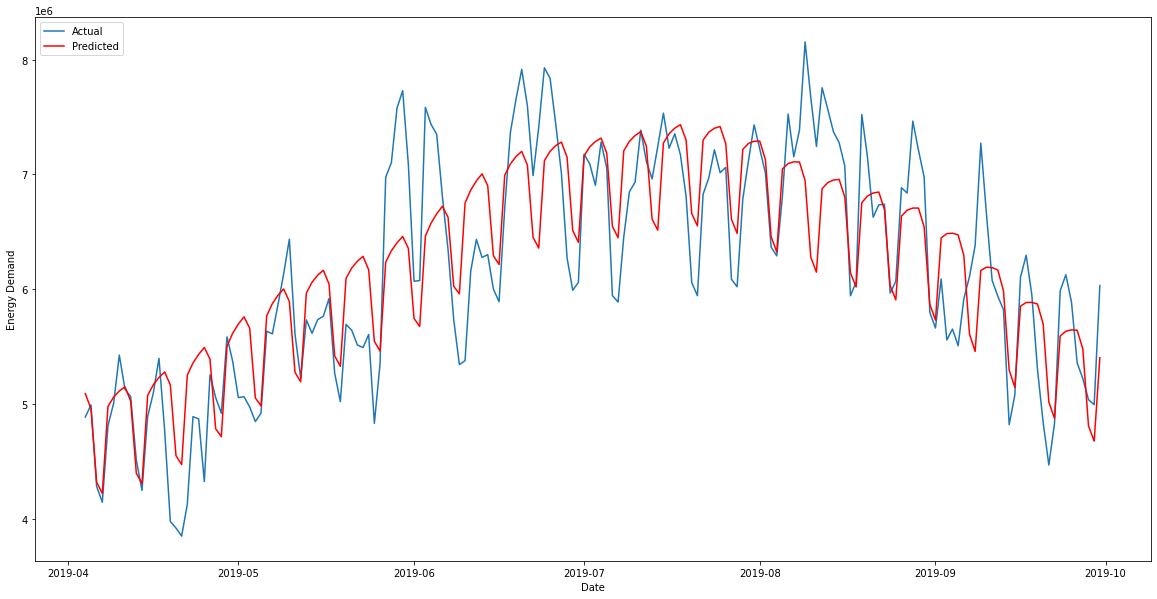

In [30]:
ts_predict = forecast.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
plt.plot(ts_test.ds,ts_test.y,label = 'Actual')
plt.plot(ts_predict.ds,ts_predict.yhat,color='r',label = 'Predicted')
plt.legend(loc='upper left')
plt.ylabel('Energy Demand')
plt.xlabel('Date')

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
def root_mean_square_error(expected,predictions):
    mse = mean_squared_error(expected, predictions)
    rmse = sqrt(mse)
    #print('RMSE: %f' % rmse)
    return(rmse)

In [32]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
from sklearn.metrics import mean_absolute_error
def check_forecast(expected,predictions,time_series):
    #rmse
    mse = mean_squared_error(expected, predictions)
    rmse = sqrt(mse)
    print('RMSE =  ' + str(rmse))
    
    #mase
    mase = mean_absolute_scaled_error(expected,predictions,time_series)
    print('MASE =  ' + str(mase))

    #mae
    mae = mean_absolute_error(expected, predictions)
    print('MAE =  ' + str(mae))

    #mape
    mape = mean_absolute_percentage_error(expected, predictions)
    print('MAPE =  ' + str(mape))
    
    return(rmse,mase,mae,mape)

In [139]:
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat)
#predictions = predictions.reshape(1,horizon)
y_train = np.array(ts_test.y)

In [109]:
expected.shape

(365,)

In [110]:
predictions.shape

(365,)

In [111]:
y_train.shape

(365,)

In [140]:
rmse, mase = check_forecast(expected,predictions,y_train)

RMSE =  524342.1770040181
MASE =  1.060641371667518


In [76]:
print('RMSE =  ' + str(rmse))

RMSE =  1526.4766300349968


In [77]:
print('MASE =  ' + str(mase))

MASE =  20.591732728254005


In [141]:
num_cp = [15,25,35,55,100,200,300]
cp_metrics = pd.DataFrame()

for cp in num_cp:
    m = Prophet(n_changepoints=cp)
    m.fit(ts_train)
    future = m.make_future_dataframe(periods=horizon)
    forecast = m.predict(future)
    expected = np.array(ts_test.y)
    predictions = np.array(forecast.tail(horizon).yhat)
    #predictions = predictions.reshape(1,horizon)
    y_train = np.array(ts_test.y)
    rmse, mase = check_forecast(expected,predictions,y_train)
    cp_metrics=cp_metrics.append({'ChangePoint':cp,'RMSE':rmse,'MASE':mase},ignore_index=True)
    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524335.3231661926
MASE =  1.0597323278056447


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524342.1770040181
MASE =  1.060641371667518


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524579.3670890079
MASE =  1.0624232040614892


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524278.2081388826
MASE =  1.0607214870250263


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524150.7153585879
MASE =  1.0596874624844477


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  523487.2028698558
MASE =  1.058241108270407
RMSE =  523569.98400647735
MASE =  1.057829186920603


In [142]:
cp_metrics

,ChangePoint,MASE,RMSE
0,15.0,1.059732,524335.323166
1,25.0,1.060641,524342.177004
2,35.0,1.062423,524579.367089
3,55.0,1.060721,524278.208139
4,100.0,1.059687,524150.715359
5,200.0,1.058241,523487.202870
6,300.0,1.057829,523569.984006


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


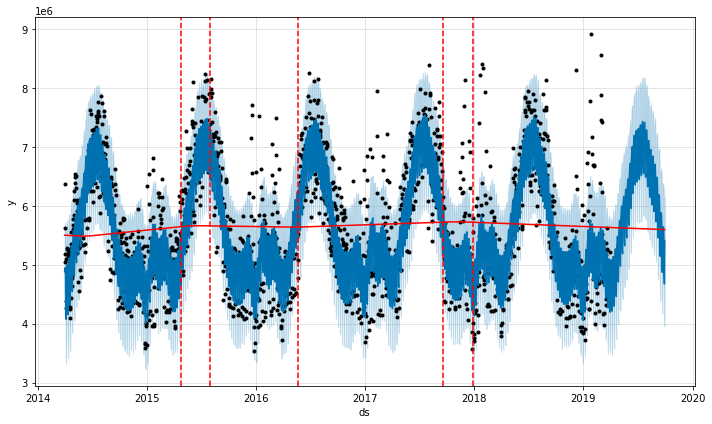

In [145]:
# Python
from fbprophet.plot import add_changepoints_to_plot
m = Prophet(n_changepoints=15)
m.fit(ts_train)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


In [146]:
cp_range = [0.7,0.75,0.8,0.85,0.9,0.95,1.0]
cp_range_metrics = pd.DataFrame()

for cp in cp_range:
    m = Prophet(changepoint_range=cp)
    m.fit(ts_train)
    forecast = m.predict(future)
    expected = np.array(ts_test.y)
    predictions = np.array(forecast.tail(horizon).yhat)
    #predictions = predictions.reshape(1,horizon)
    y_train = np.array(ts_test.y)
    rmse, mase = check_forecast(expected,predictions,y_train)
    cp_range_metrics=cp_range_metrics.append({'ChangePointRange':cp,'RMSE':rmse,'MASE':mase},ignore_index=True)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524750.1903602676
MASE =  1.0631131033358499


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524235.95151500136
MASE =  1.0598328986733618


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524342.1770040181
MASE =  1.060641371667518


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524538.9791160882
MASE =  1.0624768440558858


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524495.7622177952
MASE =  1.0617044172079535


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  524040.43619984196
MASE =  1.0585788673643002
RMSE =  524324.1254849791
MASE =  1.0617741524727056


In [147]:
cp_range_metrics

,ChangePointRange,MASE,RMSE
0,0.70,1.063113,524750.190360
1,0.75,1.059833,524235.951515
2,0.80,1.060641,524342.177004
3,0.85,1.062477,524538.979116
4,0.90,1.061704,524495.762218
5,0.95,1.058579,524040.436200
6,1.00,1.061774,524324.125485


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


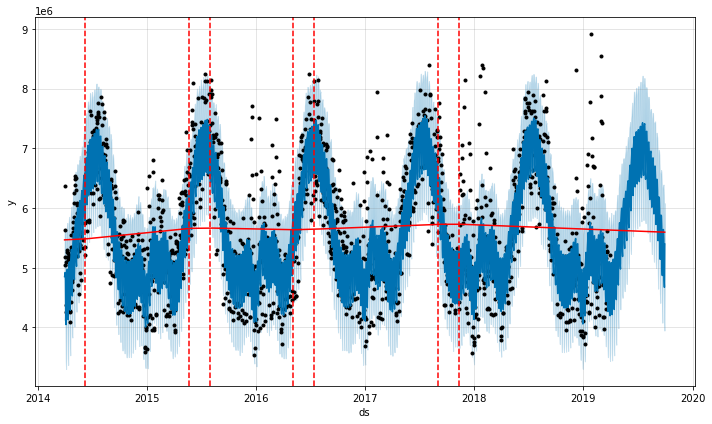

In [149]:
m = Prophet(n_changepoints=25,changepoint_range=0.95)
m.fit(ts_train)
future = m.make_future_dataframe(periods=horizon)
forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

RMSE =  524040.43619984196
MASE =  1.0585788673643002


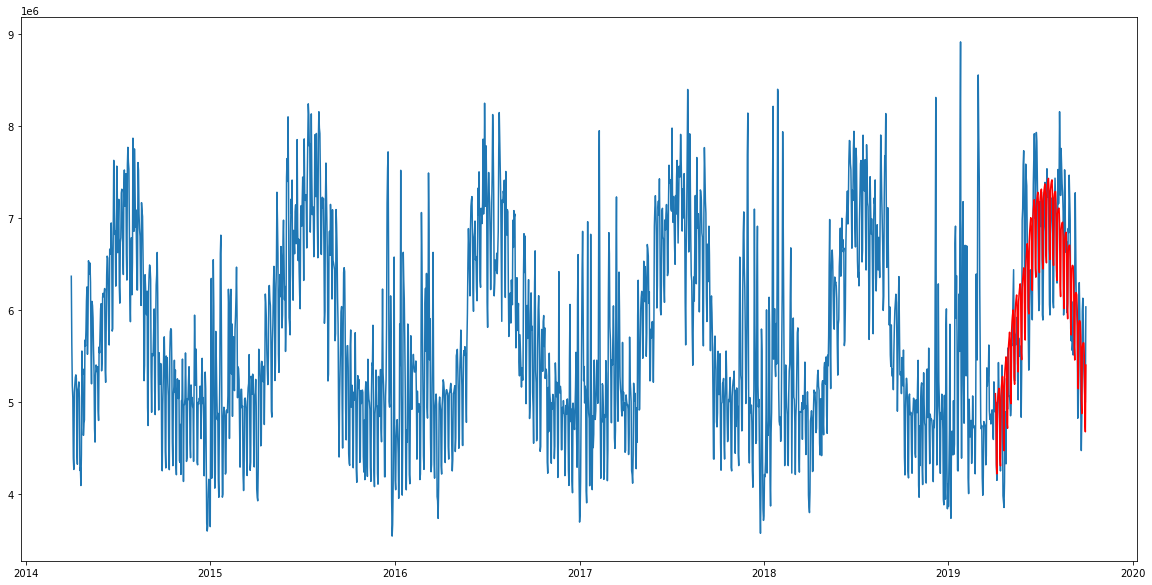

In [151]:
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse, mase = check_forecast(expected,predictions,y_test)
ts_predict = forecast.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
plt.plot(ts_data.ds,ts_data.y)
plt.plot(ts_predict.ds,ts_predict.yhat,color='r')

In [103]:
cp_range = [0.7,0.75,0.8,0.85,0.9,0.95,1.0]
num_cp = [5,10,15,25,35,55,100]
cp_num_range_metrics = pd.DataFrame()

for cp in num_cp:
    for cpr in cp_range:
        m = Prophet(n_changepoints=cp,changepoint_range=cpr)
        m.fit(ts)
        forecast = m.predict(future)
        predictions = np.array(forecast.tail(14).yhat)
        predictions = predictions.reshape(1,14)
        rmse, mase = check_forecast(expected,predictions,y_train)
        cp_num_range_metrics=cp_num_range_metrics.append({'ChangePoint':cp,'ChangePointRange':cpr,'RMSE':rmse,'MASE':mase},ignore_index=True)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1198.4906317773075
MASE =  16.156796164152656


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1307.4903123894703
MASE =  17.630253273713866


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1475.8790490628253
MASE =  19.905165644782723


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.8669047446617
MASE =  19.79678955598288


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  942.1527749514497
MASE =  12.690987798634978


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  79.2218201513682
MASE =  0.7916454109830352


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1516.4335283518546
MASE =  20.452878124283988


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1150.6952138730164
MASE =  15.511352715666549


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1440.8239192229933
MASE =  19.43160103868777


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1531.8393043139652
MASE =  20.661268643835538


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1483.8895059852905
MASE =  20.013373905094934


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  570.0345991807786
MASE =  7.6487193225362615


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  623.1110149305315
MASE =  8.32877822561618


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  545.8817244491734
MASE =  7.3207043458724295


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1185.6876781560338
MASE =  15.982474502724113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1535.449727415096
MASE =  20.707804649420193


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1457.5699601235629
MASE =  19.657832269821203


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.020721033036
MASE =  21.324044046053416


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  194.71854170206697
MASE =  2.4836954575486097


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  576.5734619257614
MASE =  7.690367025333635


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  320.4170705995945
MASE =  4.209085293173792


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1309.3316513029063
MASE =  17.653969964328677


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1426.8245298644358
MASE =  19.243049376025514


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1524.9052177648155
MASE =  20.56781687330284


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1342.0704713899013
MASE =  18.095651896363847


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  306.00696001375684
MASE =  4.042748049563444


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  456.95702784828484
MASE =  6.077032807343357


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  658.1686470445737
MASE =  8.810059215317027


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1295.722747497352
MASE =  17.469842686514678


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1425.8278022945767
MASE =  19.22788555411807


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1563.880750550141
MASE =  21.09433816908262


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1446.2353793214547
MASE =  19.504763381515655


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  262.3786822880513
MASE =  3.4356406550971266


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  462.8900484400773
MASE =  6.160988798680749


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  435.82141311148
MASE =  5.786510007552132


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1322.9020116511208
MASE =  17.83659136443314


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1460.2007072897866
MASE =  19.691537511438707


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1582.0352467751097
MASE =  21.338488292251895


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1376.7545868715022
MASE =  18.565228309506047


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  247.1518657948989
MASE =  3.224052774220191


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  530.8730825656287
MASE =  7.0873187167635185


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  633.9396490076501
MASE =  8.48477374903061


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1308.5894282874956
MASE =  17.643468087396904


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.4464042758902
MASE =  19.790045695588024


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.3789383083304
MASE =  21.329333632940113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1388.9600302938125
MASE =  18.730044251432727


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  256.5440982559199
MASE =  3.357041052817983


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  512.0771504653761
MASE =  6.828885487173432
RMSE =  631.9290929226154
MASE =  8.453042971729035


In [104]:
cp_num_range_metrics

,ChangePoint,ChangePointRange,MASE,RMSE
0,5.0,0.70,16.156796,1198.490632
1,5.0,0.75,17.630253,1307.490312
2,5.0,0.80,19.905166,1475.879049
3,5.0,0.85,19.796790,1467.866905
4,5.0,0.90,12.690988,942.152775
5,5.0,0.95,0.791645,79.221820
6,5.0,1.00,20.452878,1516.433528
7,10.0,0.70,15.511353,1150.695214
8,10.0,0.75,19.431601,1440.823919
9,10.0,0.80,20.661269,1531.839304


In [155]:
cp_prior_scale = [0.1,0.5,1.5,3.,5.0,10.0,50]
cp_prior_scale_metrics = pd.DataFrame()

for cp in cp_prior_scale:
    m = Prophet(changepoint_prior_scale=cp)
    m.fit(ts_train)
    forecast = m.predict(future)
    expected = np.array(ts_test.y)
    predictions = np.array(forecast.tail(horizon).yhat)
    #predictions = predictions.reshape(1,horizon)
    y_train = np.array(ts_test.y)
    rmse, mase = check_forecast(expected,predictions,y_train)
    cp_prior_scale_metrics=cp_prior_scale_metrics.append({'ChangePointPriorScale':cp,'RMSE':rmse,'MASE':mase},ignore_index=True)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1656.7001191673703
MASE =  27.704106350240775


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1607.511434423678
MASE =  26.8764438877006


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1602.0418271935398
MASE =  26.786096388746053


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1614.9605917640456
MASE =  27.00336440276187


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1606.0326120450084
MASE =  26.853288923074874


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1582.7279456531166
MASE =  26.461872143147055
RMSE =  1593.8531267179276
MASE =  26.64864088840506


In [113]:
cp_prior_scale_metrics

,ChangePointPriorScale,MASE,RMSE
0,0.03,20.535185,1522.501797
1,0.05,20.567817,1524.905218
2,0.07,20.353010,1508.998614
3,0.10,20.188928,1496.847084
4,0.30,19.555482,1449.992400
5,0.50,19.438305,1441.333465
6,1.50,19.278914,1429.559075
7,2.00,19.036651,1411.645089


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


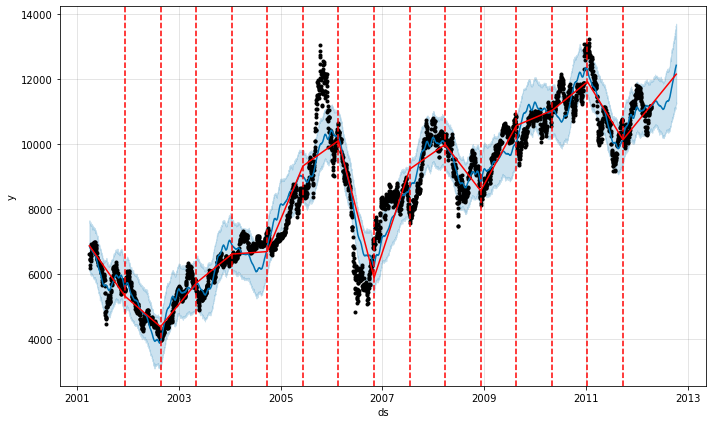

In [167]:
m = Prophet(n_changepoints=15,changepoint_range=0.95,changepoint_prior_scale=20.0)
m.fit(ts_train)
future = m.make_future_dataframe(periods=horizon)
forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

RMSE =  1124.528243498106
MASE =  17.072390168026637


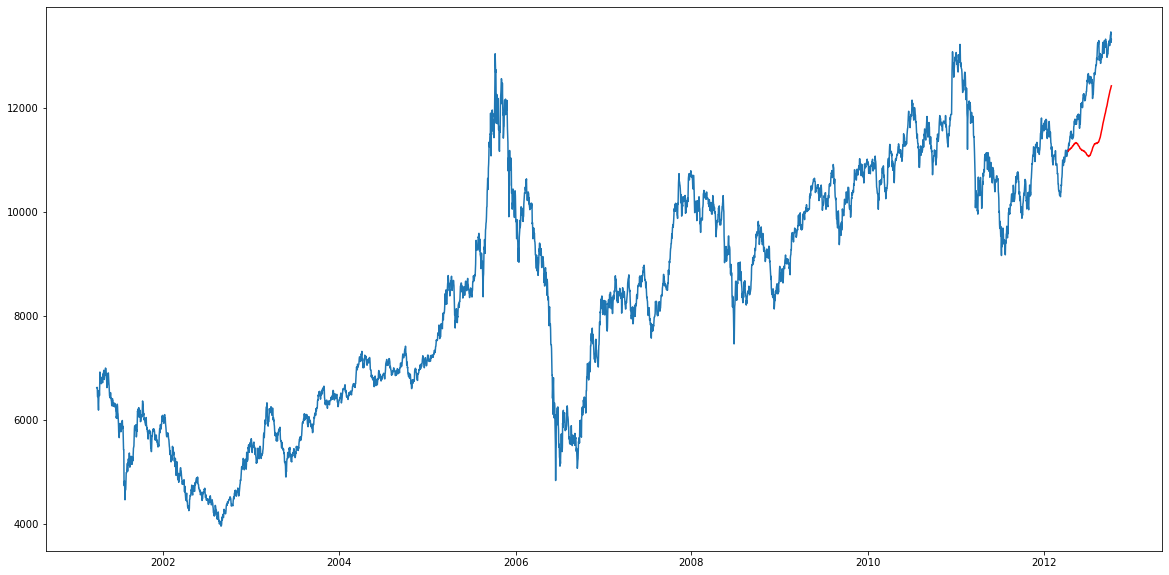

In [168]:
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse, mase = check_forecast(expected,predictions,y_test)
ts_predict = forecast.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
plt.plot(ts.ds,ts.y)
plt.plot(ts_predict.ds,ts_predict.yhat,color='r')

In [117]:
cp_range = [0.7,0.75,0.8,0.85,0.9,0.95,1.0]
num_cp = [5,10,15,25,35,55,100]
cp_prior_scale = [0.001,0.01,0.05,0.1,0.5]
cp1_metrics = pd.DataFrame()

for cps in cp_prior_scale:
    for cp in num_cp:
        for cpr in cp_range:
            m = Prophet(n_changepoints=cp,changepoint_range=cpr)
            m.fit(ts)
            forecast = m.predict(future)
            predictions = np.array(forecast.tail(14).yhat)
            predictions = predictions.reshape(1,14)
            rmse, mase = check_forecast(expected,predictions,y_train)
            cp1_metrics=cp1_metrics.append({'ChangePoint':cp,'ChangePointRange':cpr,'ChangePointPriorScale':cps,'RMSE':rmse,'MASE':mase},ignore_index=True)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1198.4906317773075
MASE =  16.156796164152656


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1307.4903123894703
MASE =  17.630253273713866


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1475.8790490628253
MASE =  19.905165644782723


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.8669047446617
MASE =  19.79678955598288


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  942.1527749514497
MASE =  12.690987798634978


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  79.2218201513682
MASE =  0.7916454109830352


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1516.4335283518546
MASE =  20.452878124283988


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1150.6952138730164
MASE =  15.511352715666549


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1440.8239192229933
MASE =  19.43160103868777


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1531.8393043139652
MASE =  20.661268643835538


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1483.8895059852905
MASE =  20.013373905094934


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  570.0345991807786
MASE =  7.6487193225362615


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  623.1110149305315
MASE =  8.32877822561618


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  545.8817244491734
MASE =  7.3207043458724295


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1185.6876781560338
MASE =  15.982474502724113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1535.449727415096
MASE =  20.707804649420193


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1457.5699601235629
MASE =  19.657832269821203


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.020721033036
MASE =  21.324044046053416


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  194.71854170206697
MASE =  2.4836954575486097


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  576.5734619257614
MASE =  7.690367025333635


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  320.4170705995945
MASE =  4.209085293173792


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1309.3316513029063
MASE =  17.653969964328677


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1426.8245298644358
MASE =  19.243049376025514


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1524.9052177648155
MASE =  20.56781687330284


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1342.0704713899013
MASE =  18.095651896363847


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  306.00696001375684
MASE =  4.042748049563444


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  456.95702784828484
MASE =  6.077032807343357


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  658.1686470445737
MASE =  8.810059215317027


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1295.722747497352
MASE =  17.469842686514678


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1425.8278022945767
MASE =  19.22788555411807


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1563.880750550141
MASE =  21.09433816908262


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1446.2353793214547
MASE =  19.504763381515655


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  262.3786822880513
MASE =  3.4356406550971266


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  462.8900484400773
MASE =  6.160988798680749


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  435.82141311148
MASE =  5.786510007552132


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1322.9020116511208
MASE =  17.83659136443314


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1460.2007072897866
MASE =  19.691537511438707


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1582.0352467751097
MASE =  21.338488292251895


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1376.7545868715022
MASE =  18.565228309506047


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  247.1518657948989
MASE =  3.224052774220191


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  530.8730825656287
MASE =  7.0873187167635185


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  633.9396490076501
MASE =  8.48477374903061


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1308.5894282874956
MASE =  17.643468087396904


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.4464042758902
MASE =  19.790045695588024


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.3789383083304
MASE =  21.329333632940113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1388.9600302938125
MASE =  18.730044251432727


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  256.5440982559199
MASE =  3.357041052817983


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  512.0771504653761
MASE =  6.828885487173432


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  631.9290929226154
MASE =  8.453042971729035


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1198.4906317773075
MASE =  16.156796164152656


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1307.4903123894703
MASE =  17.630253273713866


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1475.8790490628253
MASE =  19.905165644782723


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.8669047446617
MASE =  19.79678955598288


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  942.1527749514497
MASE =  12.690987798634978


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  79.2218201513682
MASE =  0.7916454109830352


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1516.4335283518546
MASE =  20.452878124283988


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1150.6952138730164
MASE =  15.511352715666549


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1440.8239192229933
MASE =  19.43160103868777


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1531.8393043139652
MASE =  20.661268643835538


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1483.8895059852905
MASE =  20.013373905094934


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  570.0345991807786
MASE =  7.6487193225362615


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  623.1110149305315
MASE =  8.32877822561618


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  545.8817244491734
MASE =  7.3207043458724295


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1185.6876781560338
MASE =  15.982474502724113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1535.449727415096
MASE =  20.707804649420193


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1457.5699601235629
MASE =  19.657832269821203


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.020721033036
MASE =  21.324044046053416


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  194.71854170206697
MASE =  2.4836954575486097


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  576.5734619257614
MASE =  7.690367025333635


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  320.4170705995945
MASE =  4.209085293173792


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1309.3316513029063
MASE =  17.653969964328677


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1426.8245298644358
MASE =  19.243049376025514


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1524.9052177648155
MASE =  20.56781687330284


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1342.0704713899013
MASE =  18.095651896363847


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  306.00696001375684
MASE =  4.042748049563444


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  456.95702784828484
MASE =  6.077032807343357


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  658.1686470445737
MASE =  8.810059215317027


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1295.722747497352
MASE =  17.469842686514678


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1425.8278022945767
MASE =  19.22788555411807


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1563.880750550141
MASE =  21.09433816908262


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1446.2353793214547
MASE =  19.504763381515655


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  262.3786822880513
MASE =  3.4356406550971266


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  462.8900484400773
MASE =  6.160988798680749


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  435.82141311148
MASE =  5.786510007552132


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1322.9020116511208
MASE =  17.83659136443314


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1460.2007072897866
MASE =  19.691537511438707


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1582.0352467751097
MASE =  21.338488292251895


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1376.7545868715022
MASE =  18.565228309506047


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  247.1518657948989
MASE =  3.224052774220191


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  530.8730825656287
MASE =  7.0873187167635185


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  633.9396490076501
MASE =  8.48477374903061


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1308.5894282874956
MASE =  17.643468087396904


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.4464042758902
MASE =  19.790045695588024


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.3789383083304
MASE =  21.329333632940113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1388.9600302938125
MASE =  18.730044251432727


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  256.5440982559199
MASE =  3.357041052817983


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  512.0771504653761
MASE =  6.828885487173432


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  631.9290929226154
MASE =  8.453042971729035


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1198.4906317773075
MASE =  16.156796164152656


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1307.4903123894703
MASE =  17.630253273713866


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1475.8790490628253
MASE =  19.905165644782723


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.8669047446617
MASE =  19.79678955598288


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  942.1527749514497
MASE =  12.690987798634978


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  79.2218201513682
MASE =  0.7916454109830352


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1516.4335283518546
MASE =  20.452878124283988


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1150.6952138730164
MASE =  15.511352715666549


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1440.8239192229933
MASE =  19.43160103868777


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1531.8393043139652
MASE =  20.661268643835538


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1483.8895059852905
MASE =  20.013373905094934


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  570.0345991807786
MASE =  7.6487193225362615


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  623.1110149305315
MASE =  8.32877822561618


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  545.8817244491734
MASE =  7.3207043458724295


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1185.6876781560338
MASE =  15.982474502724113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1535.449727415096
MASE =  20.707804649420193


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1457.5699601235629
MASE =  19.657832269821203


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.020721033036
MASE =  21.324044046053416


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  194.71854170206697
MASE =  2.4836954575486097


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  576.5734619257614
MASE =  7.690367025333635


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  320.4170705995945
MASE =  4.209085293173792


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1309.3316513029063
MASE =  17.653969964328677


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1426.8245298644358
MASE =  19.243049376025514


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1524.9052177648155
MASE =  20.56781687330284


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1342.0704713899013
MASE =  18.095651896363847


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  306.00696001375684
MASE =  4.042748049563444


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  456.95702784828484
MASE =  6.077032807343357


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  658.1686470445737
MASE =  8.810059215317027


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1295.722747497352
MASE =  17.469842686514678


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1425.8278022945767
MASE =  19.22788555411807


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1563.880750550141
MASE =  21.09433816908262


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1446.2353793214547
MASE =  19.504763381515655


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  262.3786822880513
MASE =  3.4356406550971266


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  462.8900484400773
MASE =  6.160988798680749


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  435.82141311148
MASE =  5.786510007552132


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1322.9020116511208
MASE =  17.83659136443314


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1460.2007072897866
MASE =  19.691537511438707


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1582.0352467751097
MASE =  21.338488292251895


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1376.7545868715022
MASE =  18.565228309506047


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  247.1518657948989
MASE =  3.224052774220191


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  530.8730825656287
MASE =  7.0873187167635185


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  633.9396490076501
MASE =  8.48477374903061


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1308.5894282874956
MASE =  17.643468087396904


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.4464042758902
MASE =  19.790045695588024


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.3789383083304
MASE =  21.329333632940113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1388.9600302938125
MASE =  18.730044251432727


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  256.5440982559199
MASE =  3.357041052817983


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  512.0771504653761
MASE =  6.828885487173432


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  631.9290929226154
MASE =  8.453042971729035


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1198.4906317773075
MASE =  16.156796164152656


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1307.4903123894703
MASE =  17.630253273713866


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1475.8790490628253
MASE =  19.905165644782723


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.8669047446617
MASE =  19.79678955598288


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  942.1527749514497
MASE =  12.690987798634978


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  79.2218201513682
MASE =  0.7916454109830352


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1516.4335283518546
MASE =  20.452878124283988


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1150.6952138730164
MASE =  15.511352715666549


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1440.8239192229933
MASE =  19.43160103868777


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1531.8393043139652
MASE =  20.661268643835538


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1483.8895059852905
MASE =  20.013373905094934


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  570.0345991807786
MASE =  7.6487193225362615


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  623.1110149305315
MASE =  8.32877822561618


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  545.8817244491734
MASE =  7.3207043458724295


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1185.6876781560338
MASE =  15.982474502724113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1535.449727415096
MASE =  20.707804649420193


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1457.5699601235629
MASE =  19.657832269821203


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.020721033036
MASE =  21.324044046053416


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  194.71854170206697
MASE =  2.4836954575486097


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  576.5734619257614
MASE =  7.690367025333635


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  320.4170705995945
MASE =  4.209085293173792


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1309.3316513029063
MASE =  17.653969964328677


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1426.8245298644358
MASE =  19.243049376025514


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1524.9052177648155
MASE =  20.56781687330284


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1342.0704713899013
MASE =  18.095651896363847


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  306.00696001375684
MASE =  4.042748049563444


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  456.95702784828484
MASE =  6.077032807343357


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  658.1686470445737
MASE =  8.810059215317027


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1295.722747497352
MASE =  17.469842686514678


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1425.8278022945767
MASE =  19.22788555411807


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1563.880750550141
MASE =  21.09433816908262


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1446.2353793214547
MASE =  19.504763381515655


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  262.3786822880513
MASE =  3.4356406550971266


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  462.8900484400773
MASE =  6.160988798680749


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  435.82141311148
MASE =  5.786510007552132


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1322.9020116511208
MASE =  17.83659136443314


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1460.2007072897866
MASE =  19.691537511438707


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1582.0352467751097
MASE =  21.338488292251895


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1376.7545868715022
MASE =  18.565228309506047


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  247.1518657948989
MASE =  3.224052774220191


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  530.8730825656287
MASE =  7.0873187167635185


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  633.9396490076501
MASE =  8.48477374903061


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1308.5894282874956
MASE =  17.643468087396904


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.4464042758902
MASE =  19.790045695588024


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.3789383083304
MASE =  21.329333632940113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1388.9600302938125
MASE =  18.730044251432727


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  256.5440982559199
MASE =  3.357041052817983


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  512.0771504653761
MASE =  6.828885487173432


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  631.9290929226154
MASE =  8.453042971729035


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1198.4906317773075
MASE =  16.156796164152656


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1307.4903123894703
MASE =  17.630253273713866


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1475.8790490628253
MASE =  19.905165644782723


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1467.8669047446617
MASE =  19.79678955598288


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  942.1527749514497
MASE =  12.690987798634978


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  79.2218201513682
MASE =  0.7916454109830352


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1516.4335283518546
MASE =  20.452878124283988


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1150.6952138730164
MASE =  15.511352715666549


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1440.8239192229933
MASE =  19.43160103868777


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1531.8393043139652
MASE =  20.661268643835538


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1483.8895059852905
MASE =  20.013373905094934


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  570.0345991807786
MASE =  7.6487193225362615


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  623.1110149305315
MASE =  8.32877822561618


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  545.8817244491734
MASE =  7.3207043458724295


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1185.6876781560338
MASE =  15.982474502724113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1535.449727415096
MASE =  20.707804649420193


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1457.5699601235629
MASE =  19.657832269821203


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1581.020721033036
MASE =  21.324044046053416


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  194.71854170206697
MASE =  2.4836954575486097


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  576.5734619257614
MASE =  7.690367025333635


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  320.4170705995945
MASE =  4.209085293173792


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1309.3316513029063
MASE =  17.653969964328677


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1426.8245298644358
MASE =  19.243049376025514


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1524.9052177648155
MASE =  20.56781687330284


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1342.0704713899013
MASE =  18.095651896363847


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  306.00696001375684
MASE =  4.042748049563444


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  456.95702784828484
MASE =  6.077032807343357


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  658.1686470445737
MASE =  8.810059215317027


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1295.722747497352
MASE =  17.469842686514678


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1425.8278022945767
MASE =  19.22788555411807


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1563.880750550141
MASE =  21.09433816908262


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1446.2353793214547
MASE =  19.504763381515655


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  262.3786822880513
MASE =  3.4356406550971266


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  462.8900484400773
MASE =  6.160988798680749


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  435.82141311148
MASE =  5.786510007552132


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1322.9020116511208
MASE =  17.83659136443314


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1460.2007072897866
MASE =  19.691537511438707


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1582.0352467751097
MASE =  21.338488292251895


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  1376.7545868715022
MASE =  18.565228309506047


KeyboardInterrupt: 

In [119]:
pip install statsmodels

  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
Note: you may need to restart the kernel to use updated packages.


In [35]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

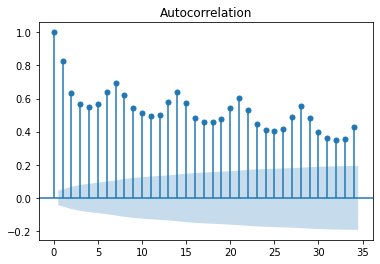

In [36]:
sm.graphics.tsa.plot_acf(ts_data.y.values)
plt.show()

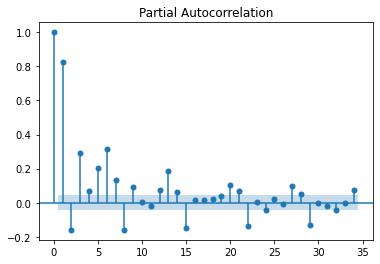

In [37]:
sm.graphics.tsa.plot_pacf(ts_data.y.values)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  662316.4500748882
MASE =  1.4174051295435552


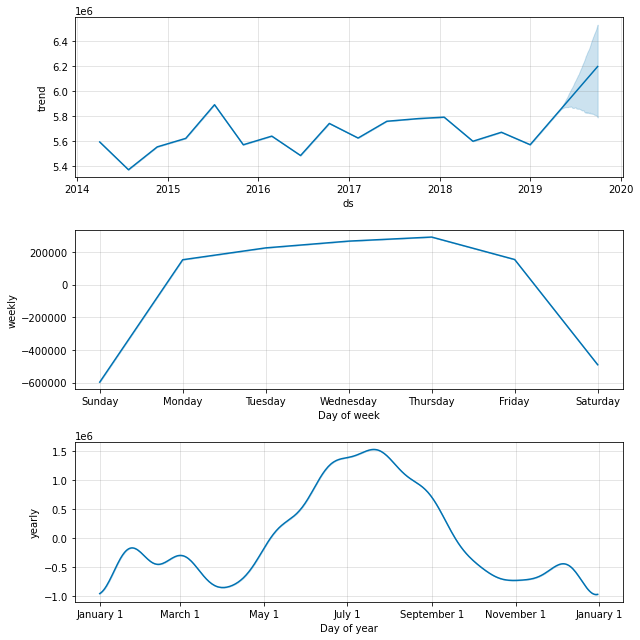

In [152]:
m = Prophet(n_changepoints=15,changepoint_range=0.95,changepoint_prior_scale=20.0)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(ts_train)
future = m.make_future_dataframe(periods=horizon)
forecast = m.predict(future)

fig = m.plot_components(forecast)
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat)
#predictions = predictions.reshape(1,horizon)
y_train = np.array(ts_test.y)
rmse, mase = check_forecast(expected,predictions,y_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  654840.8131073688
MASE =  1.398321493766691


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  644213.3479550125
MASE =  1.3696152445282515


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  642082.7936621645
MASE =  1.3532149148610788


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  639896.085963058
MASE =  1.3404135805463278


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  616253.7550933145
MASE =  1.2895363002149898


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  719700.6860147642
MASE =  1.5220219117373701


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  875817.8827461954
MASE =  1.876452256314588
RMSE =  1618209.192912042
MASE =  3.1730211119079463


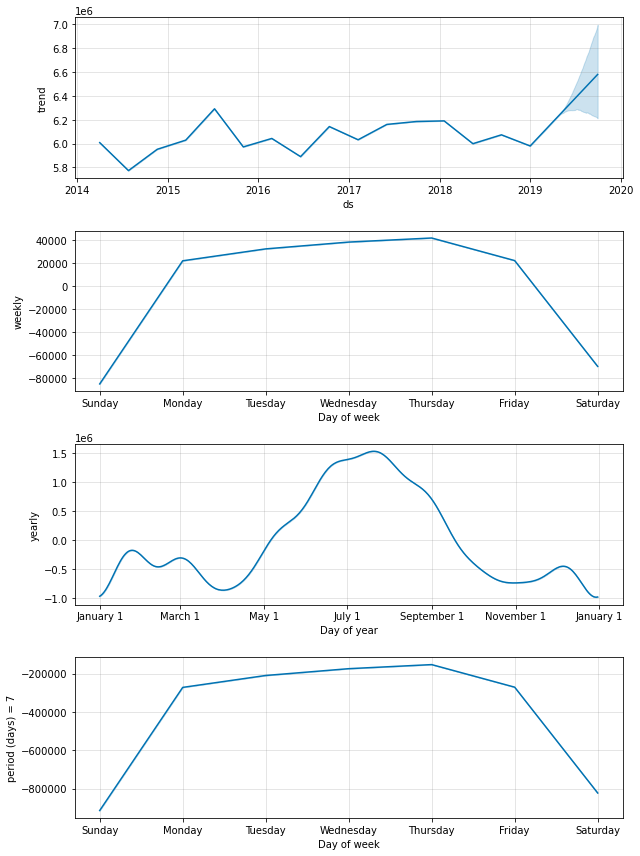

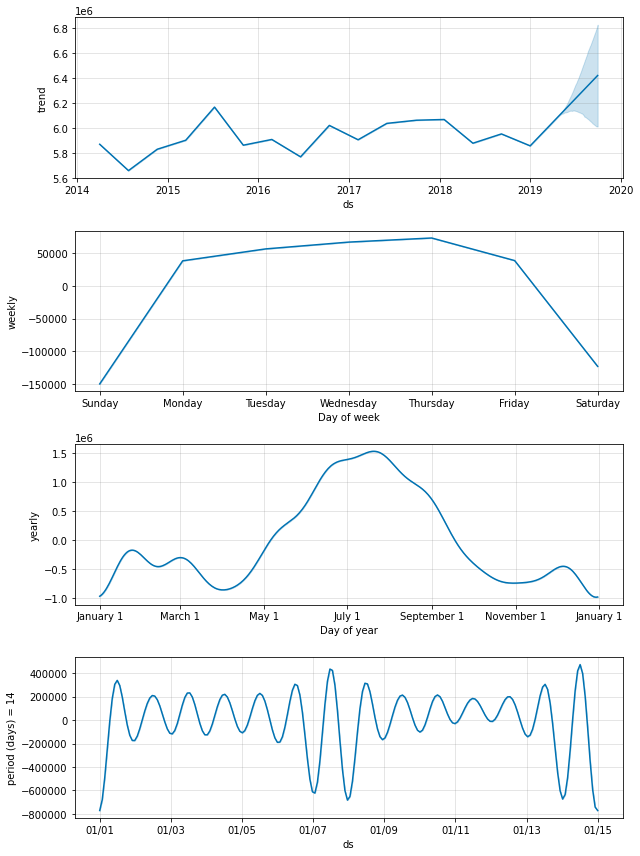

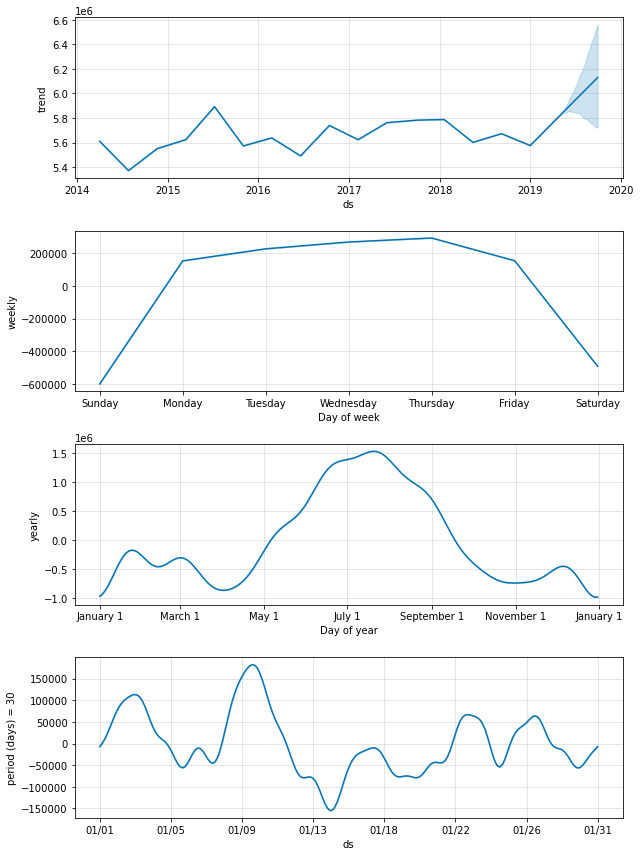

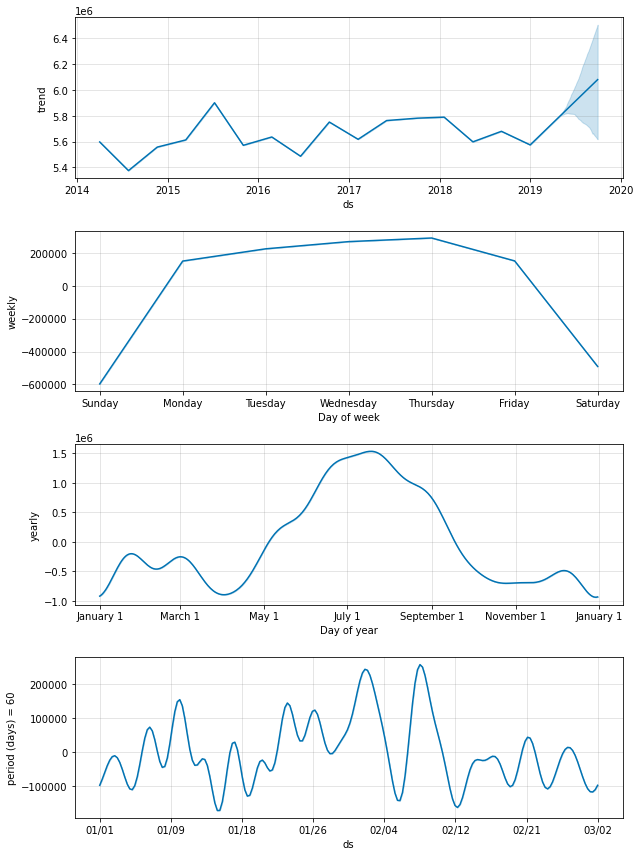

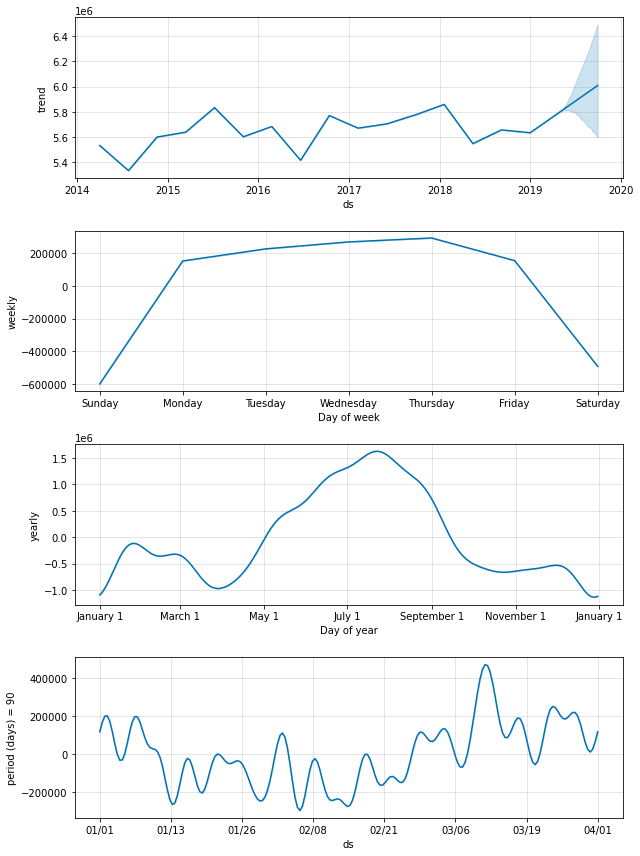

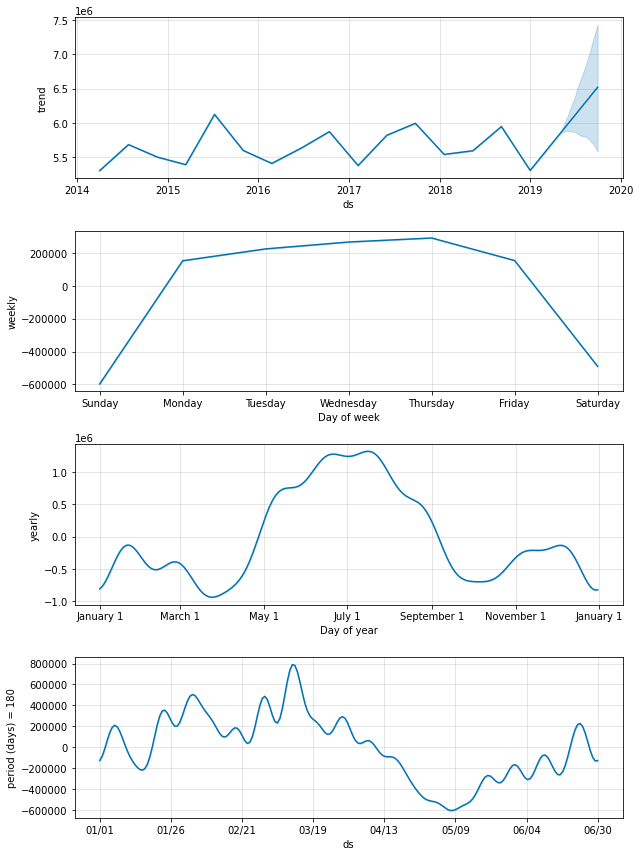

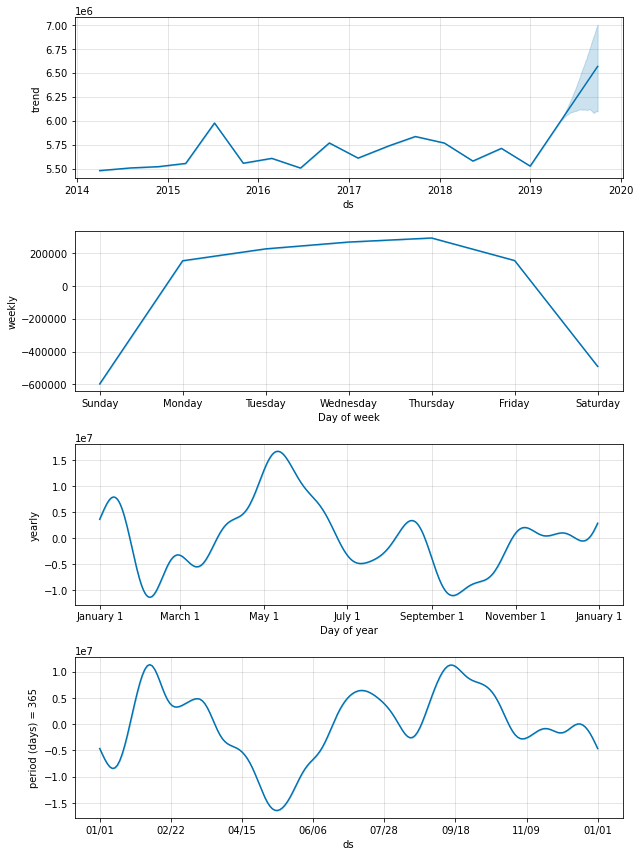

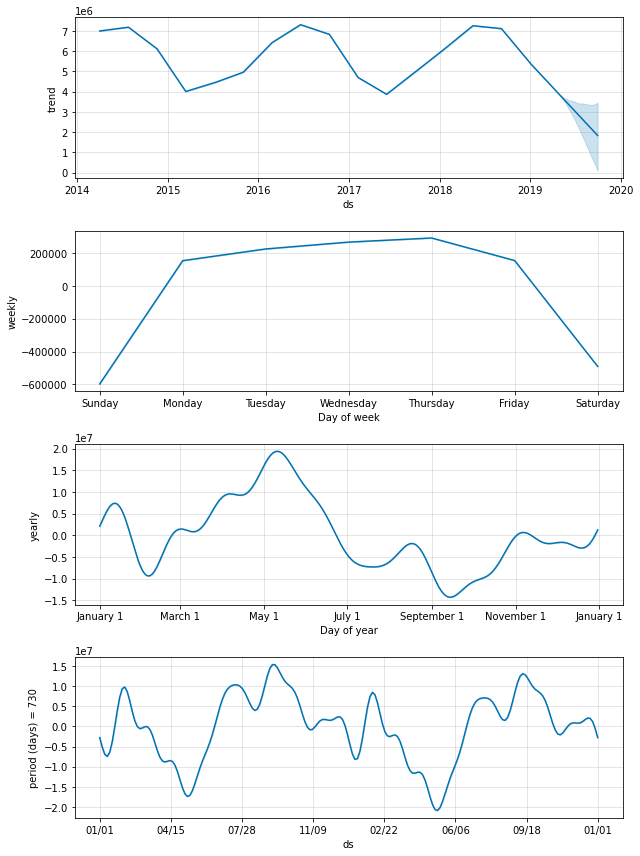

In [153]:
seas_period = [7,14,30,60,90,180,365,2*365]
#seas_period = []
sp_metrics = pd.DataFrame()
#m = Prophet(n_changepoints=15,changepoint_range=0.95,changepoint_prior_scale=20.0)
for sp in seas_period:
    m = Prophet(n_changepoints=15,changepoint_range=0.95,changepoint_prior_scale=20.0)
    m.add_seasonality(name='period (days) = ' + str(sp), period=sp, fourier_order=20)
    
    m.fit(ts_train)
    future = m.make_future_dataframe(periods=horizon)
    forecast = m.predict(future)
    fig = m.plot_components(forecast)
    expected = np.array(ts_test.y)
    predictions = np.array(forecast.tail(horizon).yhat)
    #predictions = predictions.reshape(1,horizon)
    y_train = np.array(ts_test.y)
    rmse, mase = check_forecast(expected,predictions,y_train)
    sp_metrics=sp_metrics.append({'SeasonalityPeriod':sp,'RMSE':rmse,'MASE':mase},ignore_index=True)

In [154]:
sp_metrics

,MASE,RMSE,SeasonalityPeriod
0,1.398321,6.548408e+05,7.0
1,1.369615,6.442133e+05,14.0
2,1.353215,6.420828e+05,30.0
3,1.340414,6.398961e+05,60.0
4,1.289536,6.162538e+05,90.0
5,1.522022,7.197007e+05,180.0
6,1.876452,8.758179e+05,365.0
7,3.173021,1.618209e+06,730.0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE =  528859.1512199398
MASE =  1.0697158457524734
MAE =  421150.1424479408
MAPE =  6.914861110330689


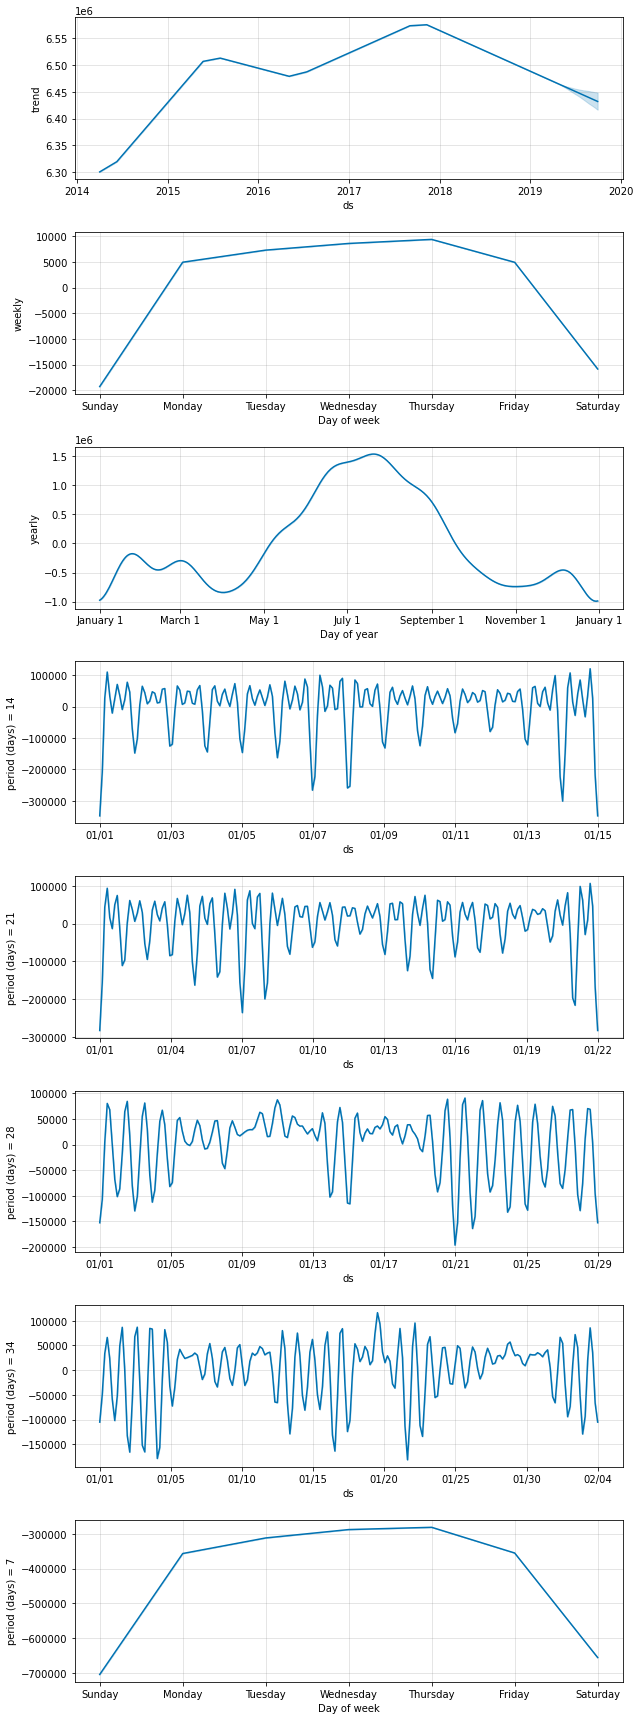

In [39]:
sea_mode = 'additive'
#sea_mode = 'multiplicative'
ff=50

m = Prophet(n_changepoints=25,changepoint_range=0.95,seasonality_mode=sea_mode,seasonality_prior_scale=20.0)
m.add_seasonality(name='period (days) = ' + str(7), period=7, fourier_order=ff,mode=sea_mode)
m.add_seasonality(name='period (days) = ' + str(14), period=14, fourier_order=ff,mode=sea_mode)
m.add_seasonality(name='period (days) = ' + str(21), period=21, fourier_order=ff,mode=sea_mode)
m.add_seasonality(name='period (days) = ' + str(34), period=34, fourier_order=ff,mode=sea_mode)
m.add_seasonality(name='period (days) = ' + str(28), period=28, fourier_order=ff,mode=sea_mode)
m.fit(ts_train)
future = m.make_future_dataframe(periods=horizon)
forecast = m.predict(future)
fig = m.plot_components(forecast)
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat)
#predictions = predictions.reshape(1,horizon)
y_train = np.array(ts_test.y)
rmse, mase,mae,mape = check_forecast(expected,predictions,y_train)

RMSE =  528859.1512199398
MASE =  1.0697158457524734
MAE =  421150.1424479408
MAPE =  6.914861110330689


Text(0, 0.5, 'Energy Demand')

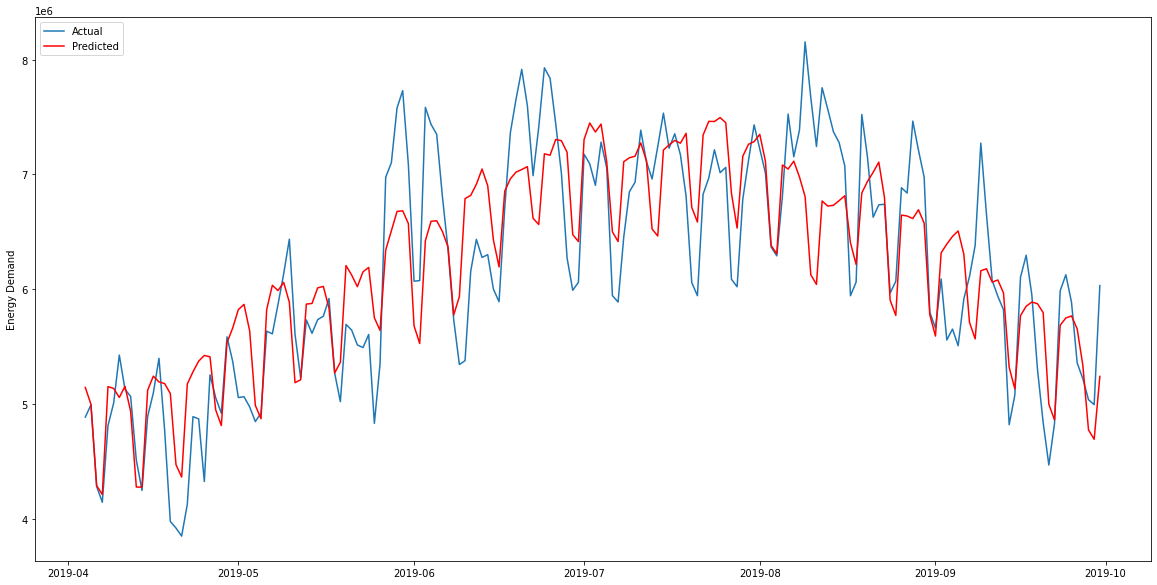

In [41]:
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse, mase, mae, mape = check_forecast(expected,predictions,y_test)
ts_predict = forecast.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
#plt.plot(ts_data.ds,ts_data.y)
plt.plot(ts_test.ds,ts_test.y,label='Actual')
plt.plot(ts_predict.ds,ts_predict.yhat,color='r',label = 'Predicted')
plt.legend(loc='upper left')
plt.ylabel('Energy Demand')

RMSE =  531657.3004309509
MASE =  1.0709631061376705


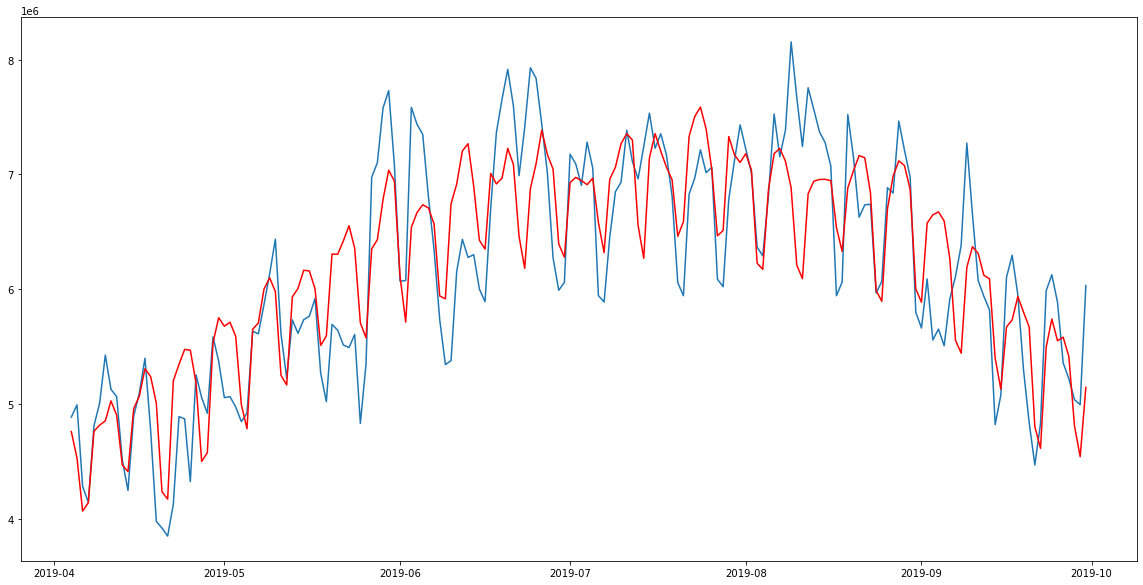

In [193]:
expected = np.array(ts_test.y)
predictions = np.array(forecast.tail(horizon).yhat)
#predictions = predictions.reshape(1,horizon)
y_test = np.array(ts_test.y)
rmse, mase = check_forecast(expected,predictions,y_test)
ts_predict = forecast.iloc[-horizon:,:]
plt.figure(figsize=(20,10))
#plt.plot(ts_data.ds,ts_data.y)
plt.plot(ts_test.ds,ts_test.y)
plt.plot(ts_predict.ds,ts_predict.yhat,color='r')

In [137]:
m = Prophet()
#m.fit(ts)

In [136]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '14 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 2003-05-01 12:00:00 and 2012-09-10 12:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [138]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2003-05-02 12:00:00,6131.812179,5925.760943,6325.916610,5613.7,2003-05-01 12:00:00
1,2003-05-03 12:00:00,6180.096352,5964.889204,6375.081942,5589.6,2003-05-01 12:00:00
2,2003-05-04 12:00:00,6204.801123,6001.167524,6404.645931,5603.3,2003-05-01 12:00:00
3,2003-05-05 12:00:00,6223.503750,6022.125710,6428.259083,5513.8,2003-05-01 12:00:00
4,2003-05-06 12:00:00,6247.870113,6050.820132,6453.416146,5467.4,2003-05-01 12:00:00


In [135]:
ts.head()

,ds,y
0,2001-03-30 12:00:00,6623.0
1,2001-03-31 12:00:00,6619.3
2,2001-04-01 12:00:00,6629.3
3,2001-04-02 12:00:00,6452.4
4,2001-04-03 12:00:00,6452.2


In [144]:
import itertools
from fbprophet.diagnostics import performance_metrics


param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(ts)  # Fit model with given params
    df_cv = cross_validation(m, initial='730 days', period='180 days',horizon='14 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 20 forecasts with cutoffs between 2003-05-01 12:00:00 and 2012-09-10 12:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002988D123588>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 20 forecasts with cutoffs between 2003-05-01 12:00:00 and 2012-09-10 12:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002988F805848>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 20 forecasts with cutoffs between 2003-05-01 12:00:00 and 2012-09-10 12:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002988D13F248>
INFO:fbprophet:Disabling daily season

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  1248.107635
1                     0.001                     0.10  1236.939948
2                     0.001                     1.00  1244.025994
3                     0.001                    10.00  1246.722253
4                     0.010                     0.01  1056.414197
5                     0.010                     0.10  1059.627715
6                     0.010                     1.00  1056.223810
7                     0.010                    10.00  1065.590294
8                     0.100                     0.01   847.543344
9                     0.100                     0.10   839.501831
10                    0.100                     1.00   841.622428
11                    0.100                    10.00   841.363892
12                    0.500                     0.01   824.974151
13                    0.500                     0.10   826.214411
14        

In [140]:
all_params

[{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.5, 'seasonal

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [32]:
series = ts_data.copy()

In [34]:
series.set_index('ds',inplace=True)

In [35]:
series.head()

,y
ds,
2001-03-30 12:00:00,6623.0
2001-03-31 12:00:00,6619.3
2001-04-01 12:00:00,6629.3
2001-04-02 12:00:00,6452.4
2001-04-03 12:00:00,6452.2


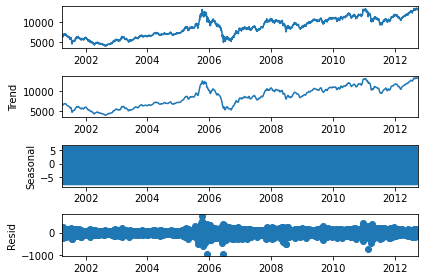

In [40]:


result = seasonal_decompose(series, model='additive',period = 10)
result.plot()
pyplot.show()


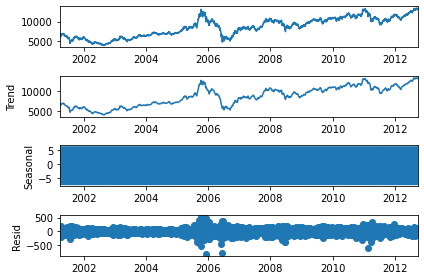

In [38]:
result.plot()
pyplot.show()